<div style = "color: Black; 
              display: fill;
              border-radius: 20px;
              background-color: #FF0000;">
    <h1 id = "title"
        style = "padding: 13px; 
                 text-align:center;
                 color: White;
                 font-size: 40px;
                 font-weight: bold;
                 font-family: Times New Roman;">YouTube Video Analysis
    </h1>
</div>

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import json

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,Gg-GxtjLjWs,2023-03-23T01:53:16Z,UCd_EkHbEutirFl_XSrg95kA,Refs just gave the Warriors a free bucket 🤣 #s...,"✅ SUBSCRIBE, LIKE & COMMENT!\n----\n📌 TikTok: ...",GD's Highlights,17,PT17S,2d,hd,False,75870,7801,168,0
1,FjSQkixKIbE,2023-03-20T09:00:11Z,UC_YEeUix2bvVOuLxEUw2SnQ,"Vodro Ovodro | Bangla Natok | Sabuj, Rabina, I...",Vodro Ovodro - New Natok 2023 - Vodro Ovodro N...,Eagle Drama Series,24,PT26M59S,2d,hd,False,766521,20205,365,0
2,Ewo8tt6bgZU,2023-03-22T16:59:25Z,UCXuqSBlHAE6Xw-yeJA0Tunw,I THOUGHT I Wanted This,FlexiSpot’s Global Spring Sale is on now until...,Linus Tech Tips,28,PT19M36S,2d,hd,False,879553,37365,2430,0
3,sxWa7LTRvbo,2023-03-22T16:00:30Z,UC1sELGmy5jp5fQUugmuYlXQ,SNIFFER EGG HATCHING & 10 YEAR OLD BUG GETS FI...,Minecraft Monthly returns for its second editi...,Minecraft,20,PT6M35S,2d,hd,True,350503,35101,2193,1
4,WBk4t14wG44,2023-03-20T13:30:44Z,UC-LPIU24bQXVljUXivKEeRQ,Saath Nibhaana Saathiya | साथ निभाना साथिया | ...,Click here to Subscribe *Star Plus* : https://...,StarPlus,24,PT6M11S,2d,hd,False,440395,3549,24,0


In [3]:
data.shape

(311, 15)

In [4]:
data.dtypes

id              object
publishedAt     object
channelId       object
title           object
description     object
channelTitle    object
categoryId       int64
duration        object
dimension       object
definition      object
caption           bool
viewCount       object
likeCount       object
commentCount    object
Trending         int64
dtype: object

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Top Trending Videos by Categories
    </h2>
</div>

In [5]:
main_data =pd.DataFrame(data[['title','categoryId','viewCount']])

In [6]:
with open("category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
main_data['category_name'] = main_data['categoryId'].map(cat_dict)

In [7]:
main_data['category_name'].value_counts()

Entertainment           94
News & Politics         51
Gaming                  36
Sports                  27
Music                   26
People & Blogs          20
Education               11
Comedy                  10
Film & Animation        10
Autos & Vehicles         8
Howto & Style            4
Science & Technology     3
Travel & Events          3
Movies                   3
Pets & Animals           2
Shows                    1
Name: category_name, dtype: int64

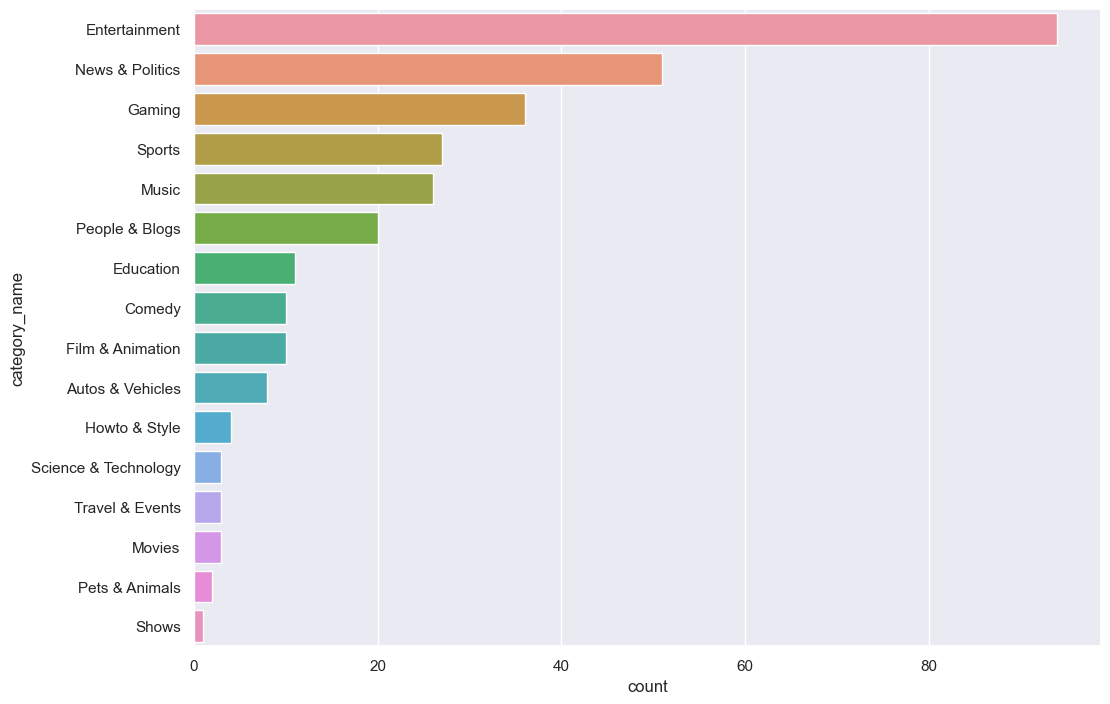

In [8]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(y = "category_name",data=main_data, order=main_data['category_name'].value_counts().index)
plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Displaying Most Number of Posts By Hours
    </h2>
</div>

In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [10]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,Gg-GxtjLjWs,2023-03-23T01:53:16Z,UCd_EkHbEutirFl_XSrg95kA,Refs just gave the Warriors a free bucket 🤣 #s...,"✅ SUBSCRIBE, LIKE & COMMENT!\n----\n📌 TikTok: ...",GD's Highlights,17,PT17S,2d,hd,False,75870,7801,168,0
1,FjSQkixKIbE,2023-03-20T09:00:11Z,UC_YEeUix2bvVOuLxEUw2SnQ,"Vodro Ovodro | Bangla Natok | Sabuj, Rabina, I...",Vodro Ovodro - New Natok 2023 - Vodro Ovodro N...,Eagle Drama Series,24,PT26M59S,2d,hd,False,766521,20205,365,0
2,Ewo8tt6bgZU,2023-03-22T16:59:25Z,UCXuqSBlHAE6Xw-yeJA0Tunw,I THOUGHT I Wanted This,FlexiSpot’s Global Spring Sale is on now until...,Linus Tech Tips,28,PT19M36S,2d,hd,False,879553,37365,2430,0
3,sxWa7LTRvbo,2023-03-22T16:00:30Z,UC1sELGmy5jp5fQUugmuYlXQ,SNIFFER EGG HATCHING & 10 YEAR OLD BUG GETS FI...,Minecraft Monthly returns for its second editi...,Minecraft,20,PT6M35S,2d,hd,True,350503,35101,2193,1
4,WBk4t14wG44,2023-03-20T13:30:44Z,UC-LPIU24bQXVljUXivKEeRQ,Saath Nibhaana Saathiya | साथ निभाना साथिया | ...,Click here to Subscribe *Star Plus* : https://...,StarPlus,24,PT6M11S,2d,hd,False,440395,3549,24,0


In [11]:
dataT=pd.DataFrame(data[['publishedAt']])

In [12]:
dataT['publishedAt'] = pd.to_datetime(dataT['publishedAt'], format='%Y-%m-%dT%H:%M:%S.%f%Z')

In [13]:
# separates date and time into two columns from 'publish_time' column
dataT.insert(1, 'publish_date', dataT['publishedAt'].dt.date)
dataT['publishedAt'] = dataT['publishedAt'].dt.time
dataT[['hour','min','sec']] = dataT['publishedAt'].astype(str).str.split(':', expand=True).astype(int)

TOP 5 Hour values
16    33
17    23
22    23
13    21
14    20
Name: hour, dtype: int64


TypeError: countplot() got multiple values for argument 'data'

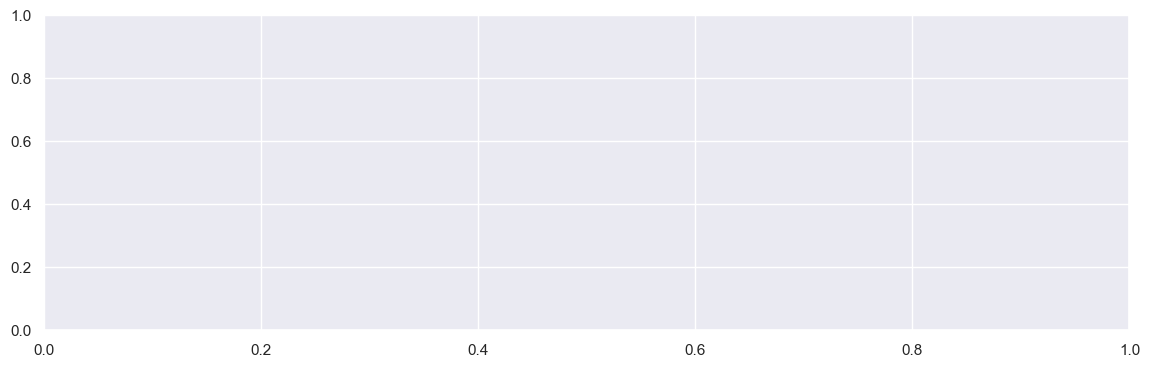

In [14]:
print("TOP 5 Hour values")
print(dataT['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sb.countplot('hour', data=dataT, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Decision Tree Model with Trending videos View Count
    </h2>
</div>

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [155]:
# remove all likeCount values with 'None' aka. disabled the likes
data = pd.read_csv('yt_dataset.csv')
testData =  data
testData.dtypes

id                      object
publishedAt             object
channelId               object
title                   object
description             object
channelTitle            object
categoryId               int64
liveBroadcastContent     int64
duration                object
dimension               object
definition              object
caption                   bool
viewCount               object
likeCount               object
commentCount            object
Trending                 int64
dtype: object

In [156]:
#Omit videos which are paid movies from dataset
testData =  testData[testData["viewCount"].str.contains("None") == False]

#Create titleCount as length of video title
testData['titleCount'] = testData['title'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

#Create descriptionCount as length of video description
testData['descriptionCount'] = testData['description'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

#Update videos with 'None' likes to 0 likes
testData.loc[testData['likeCount'] == 'None', 'likeCount'] = 0

#Update videos with 'None' comments to 0 comments
testData.loc[testData['commentCount'] == 'None', 'commentCount'] = 0

print(testData)

               id           publishedAt                 channelId  \
0     x5PLPJJy_fI  2023-03-26T12:58:39Z  UCiormkBf3jm6mfb7k0yPbKA   
2     vEw3dhAfCBA  2023-03-27T03:01:12Z  UCKwGZZMrhNYKzucCtTPY2Nw   
3     P7H1uXPCTd4  2023-03-26T22:00:08Z  UC1yBKRuGpC1tSM73A0ZjYjQ   
4     UdTC-6JBUJ0  2023-03-24T22:00:08Z  UCRi0IkmY_JbqA7P5bk9L_Uw   
5     mb4iXt-As2Y  2023-03-26T16:37:00Z  UCjvGPQTRr2eIEhthL5y31VQ   
...           ...                   ...                       ...   
2883  FTjaDD3AO1Q  2023-04-02T00:36:39Z  UC9-OpMMVoNP5o10_Iyq7Ndw   
2884  _83FZyMo9Zs  2023-04-01T07:59:57Z  UCD1Em4q90ZUK2R5HKesszJg   
2885  B4EiNWNvcr0  2023-04-01T23:18:09Z  UCJT8tQUKZu7ZtBZA0117BtQ   
2886  dNK_9ynwg8Y  2023-04-02T01:34:30Z  UCABbEMDC2EdsLuF0pkoV_cg   
2887  xS5e2o6REb4  2023-04-01T23:35:10Z  UCurvRE5fGcdUgCYWgh-BDsg   

                                                  title  \
0     Eduard Folayang vs. Amir Khan | Full Fight Fro...   
2     Highlights | Sam Burns vs. Cam Young | WGC-Del.

C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\309621281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['titleCount'] = testData['title'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\309621281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['descriptionCount'] = testData['description'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)


In [157]:

# testData['viewCount'].astype('Int64')
# testData['likeCount'].astype('Int64')
# testData['commentCount'].astype('Int64')
testData['viewCount'] = testData['viewCount'].astype('int64')
testData['likeCount'] = testData['likeCount'].astype('int64')
testData['commentCount'] = testData['commentCount'].astype('int64')
testData.dtypes

C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\400215955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['viewCount'] = testData['viewCount'].astype('int64')
C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\400215955.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['likeCount'] = testData['likeCount'].astype('int64')
C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\400215955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

id                      object
publishedAt             object
channelId               object
title                   object
description             object
channelTitle            object
categoryId               int64
liveBroadcastContent     int64
duration                object
dimension               object
definition              object
caption                   bool
viewCount                int64
likeCount                int64
commentCount             int64
Trending                 int64
titleCount               int64
descriptionCount         int64
dtype: object

In [158]:
def duration_to_seconds(duration_str):
    # Remove "PT" prefix
    duration_str = duration_str[2:]
    
    # Initialize hour, minute, and second components
    hours = 0
    minutes = 0
    seconds = 0
    
    # Check for "H" component,hour
    if "H" in duration_str:
        hours_str, duration_str = duration_str.split("H")
        hours = int(hours_str)
        
    # Check for "M" component, minute
    if "M" in duration_str:
        minutes_str, duration_str = duration_str.split("M")
        minutes = int(minutes_str)
        
    # Remove "S" suffix, (seconds) and convert remaining string to int
    if duration_str:
        seconds = int(duration_str.rstrip("S"))
    
    # Compute total duration in seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    
    return total_seconds


In [159]:
print(testData['duration'])
testData["duration"] = testData["duration"].apply(duration_to_seconds)
print(testData['duration'])

0       PT24M55S
2         PT7M2S
3       PT10M34S
4        PT12M9S
5          PT40S
          ...   
2883     PT2M17S
2884       PT51S
2885    PT23M57S
2886    PT13M41S
2887    PT13M43S
Name: duration, Length: 2781, dtype: object
0       1495
2        422
3        634
4        729
5         40
        ... 
2883     137
2884      51
2885    1437
2886     821
2887     823
Name: duration, Length: 2781, dtype: int64


C:\Users\tankk\AppData\Local\Temp\ipykernel_17012\57873979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData["duration"] = testData["duration"].apply(duration_to_seconds)


In [160]:
#Does a longer description = higher chance of trending

X = pd.DataFrame(testData[['viewCount', 'likeCount', 'descriptionCount','titleCount','duration','caption','commentCount']])
trendingData = pd.DataFrame(testData["Trending"])  # Response
print(X)
X.dtypes

      viewCount  likeCount  descriptionCount  titleCount  duration  caption  \
0        119213        985              1023          60      1495    False   
2         32524        433              1805          65       422    False   
3         34255       2369              2412          55       634    False   
4           357         33              4820          44       729    False   
5        147488      15043                 0          21        40    False   
...         ...        ...               ...         ...       ...      ...   
2883     296198       3127               332          30       137     True   
2884    2451449      51430              1920          58        51    False   
2885     163719       7968               924          31      1437    False   
2886     180780      11571               335          51       821    False   
2887    3263480      31097               586          66       823    False   

      commentCount  
0               35  
2        

viewCount           int64
likeCount           int64
descriptionCount    int64
titleCount          int64
duration            int64
caption              bool
commentCount        int64
dtype: object

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8637589928057554

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.829443447037702



<Axes: >

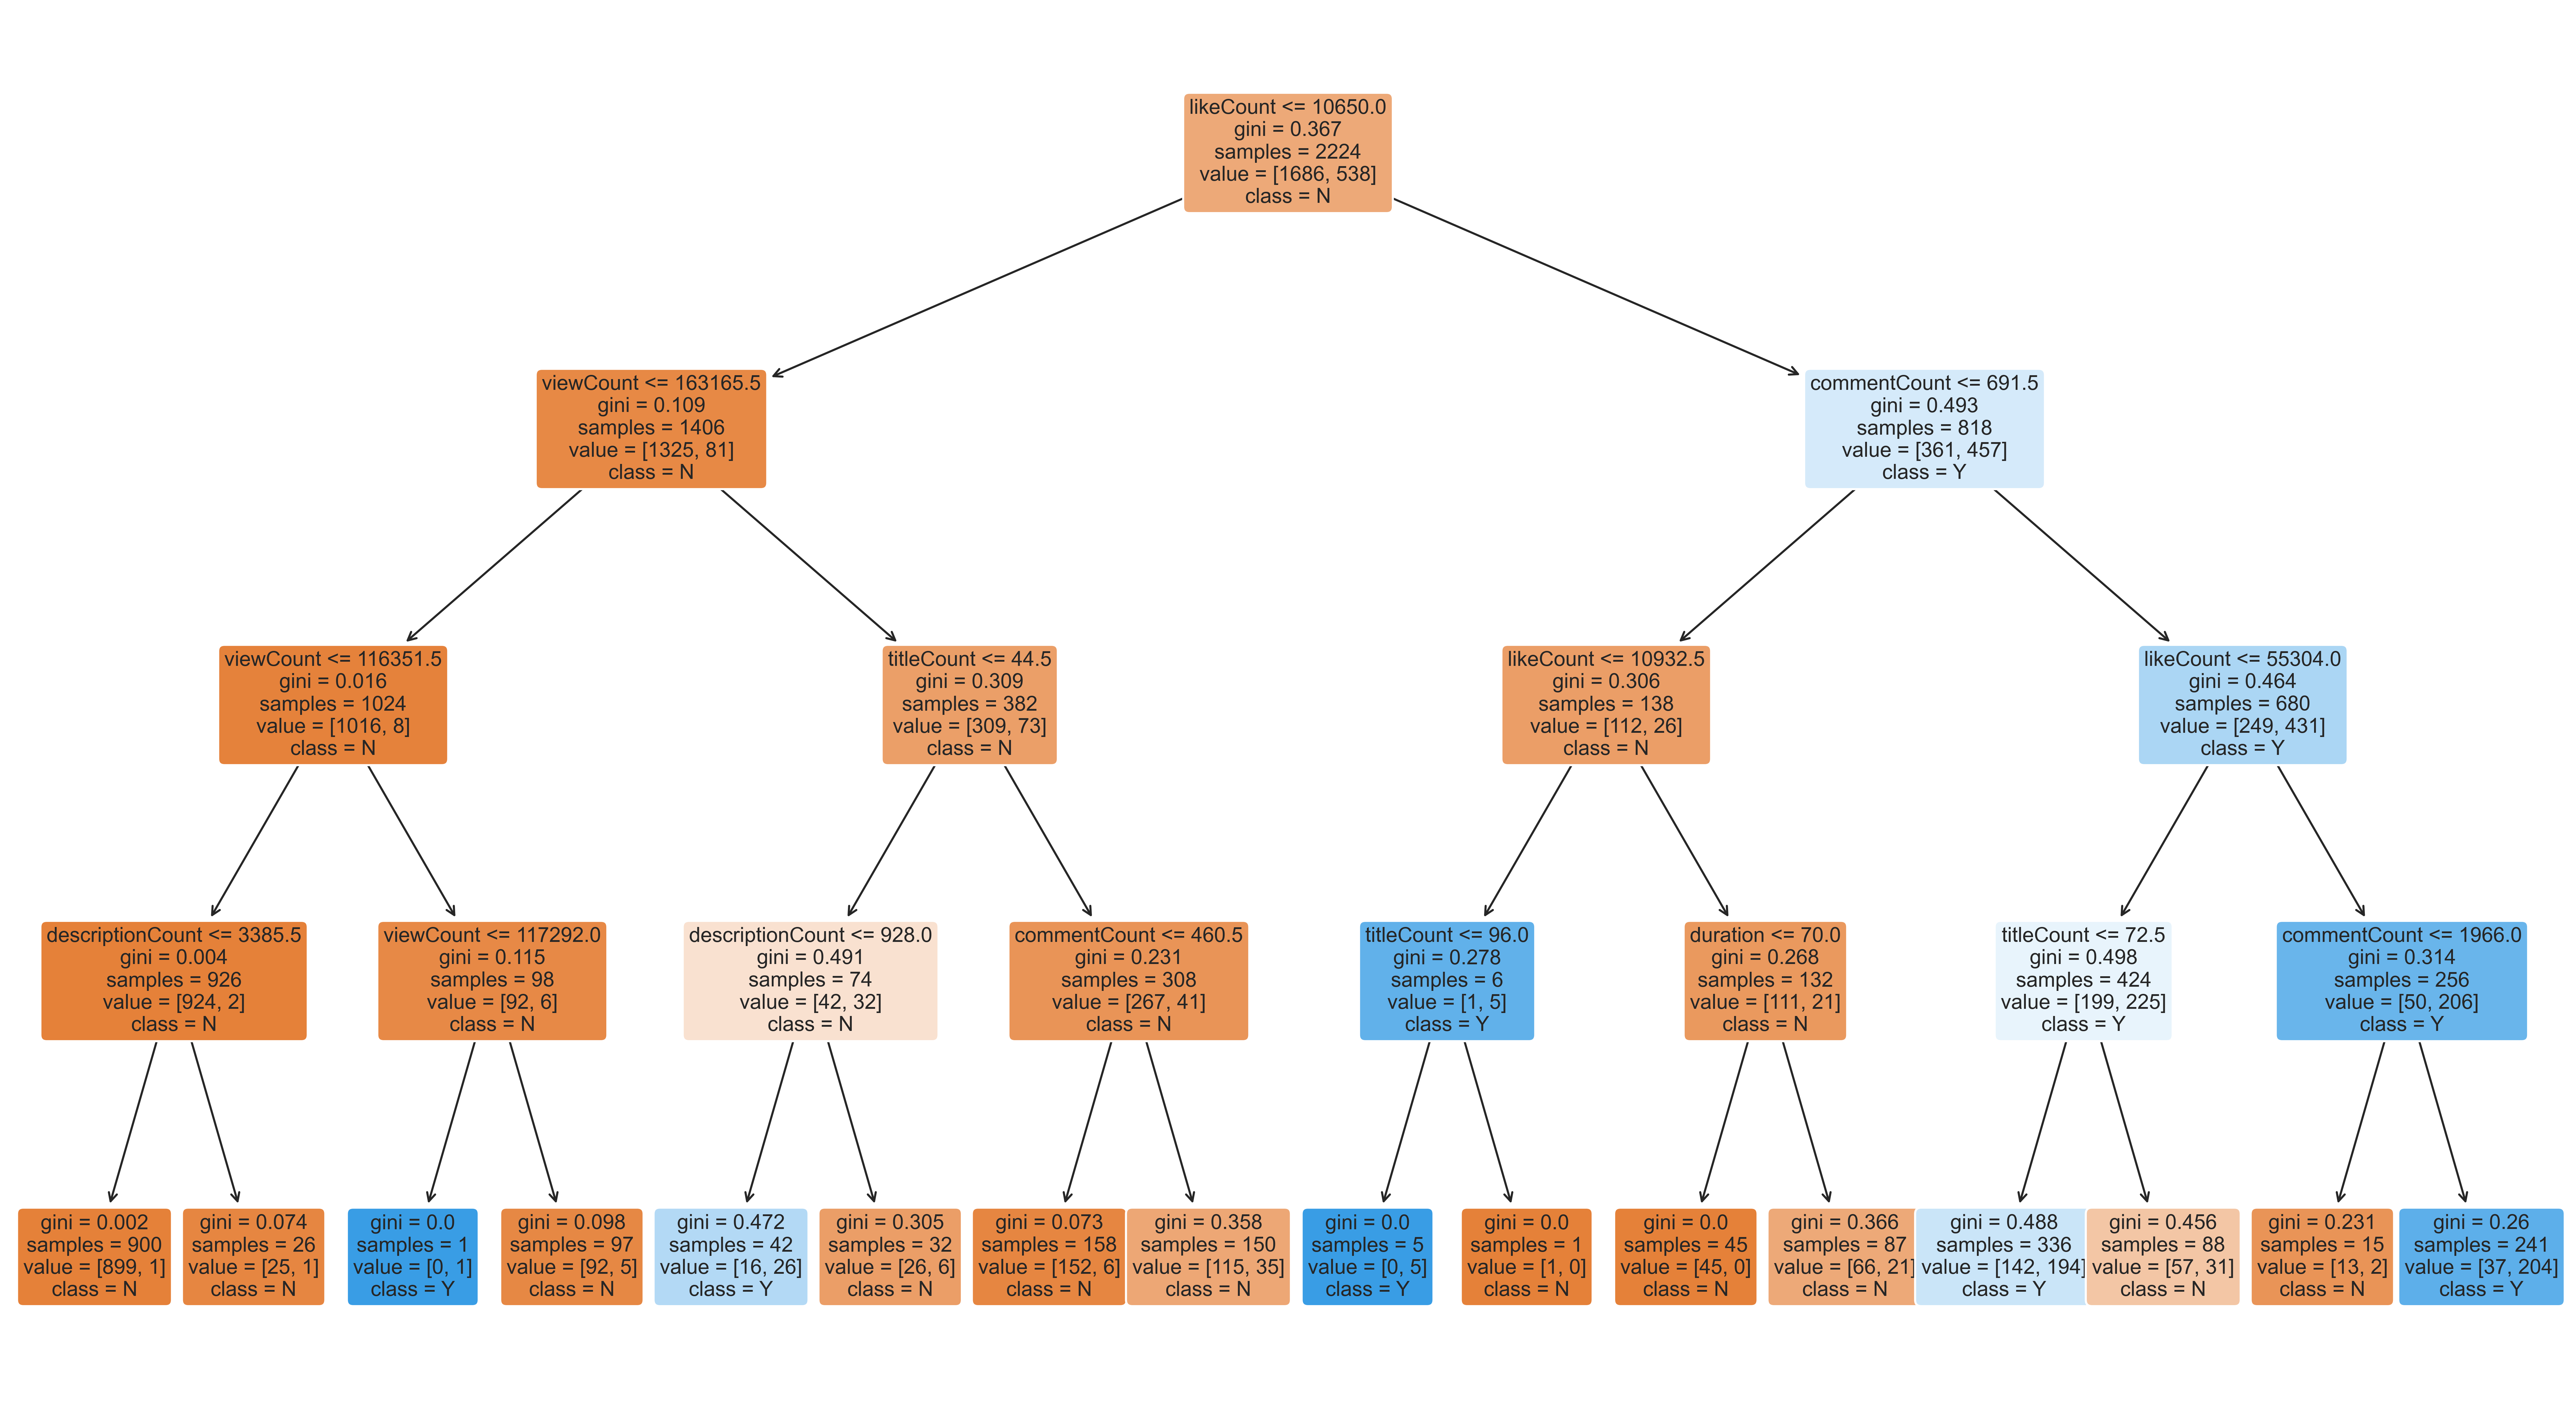

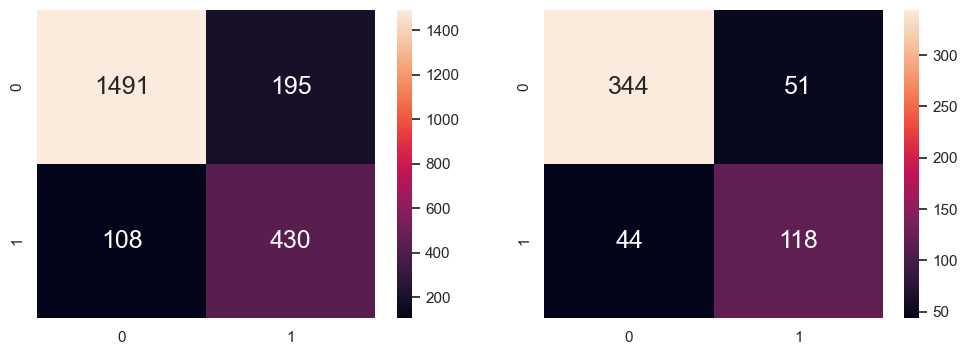

In [185]:
# Do the 80:20 thing  
X_train, X_test, y_train, y_test = train_test_split(X,trendingData,  test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)  
  

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
    

f = plt.figure(figsize=(22,12),dpi=500,)
plot_tree(dectree, filled=True, rounded=True, fontsize=10,
          feature_names=X_train.columns, 
          class_names=["N","Y"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [186]:
feature_imp = pd.Series(dectree.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

likeCount           0.712492
commentCount        0.162189
viewCount           0.052023
titleCount          0.047912
descriptionCount    0.016859
duration            0.008525
caption             0.000000
dtype: float64

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Random Forest Model with Trending videos View Count
    </h2>
</div>

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9138240574506283



<Axes: >

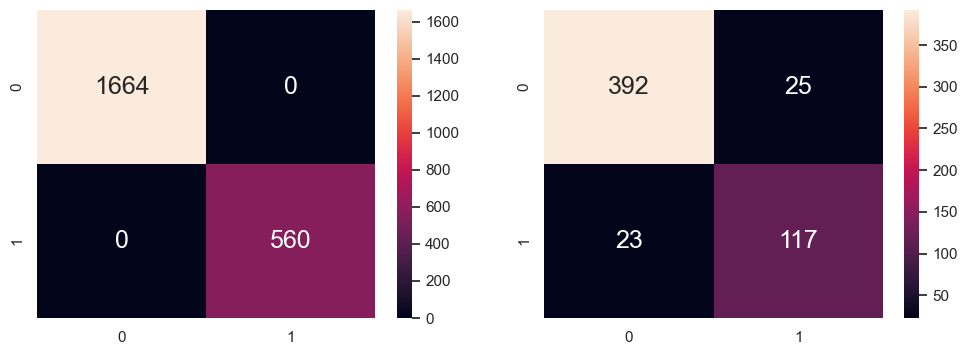

In [162]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
  
# Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())
  
# performing predictions on the train dataset
y_train_pred = clf.predict(X_train)

# performing predictions on the test dataset
y_test_pred = clf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_test, y_test_pred))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [165]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

commentCount        0.231747
likeCount           0.223340
viewCount           0.211584
titleCount          0.113266
duration            0.109471
descriptionCount    0.096206
caption             0.014386
dtype: float64